<a href="https://colab.research.google.com/github/FerrazThales/Health_Insurance_Cost_Prediction/blob/main/Health_Insurance_Cost_Prediction_with_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img width="32%" src="https://github.com/FerrazThales/FerrazThales/blob/main/logo_gif.gif?raw=true">

[Thales Ferraz 👨‍💻 | Data Scientist](https://thalesferraz.medium.com/)

* Visite também o meu artigo sobre esta análise no [Medium]()

* Visite mais projetos do meu portfólio no [Github](https://bit.ly/3DQyZHu)

* Vamos trocar mais idéias sobre Data Science no [LinkedIn](https://www.linkedin.com/in/thalesdefreitasferraz/)?

# O que você vai aprender nesta análise

* O que é **seguro de vida**, como ele é calculado e a sua importância para seus familiares.
* O que é um algoritmo de **regressão** e algumas de suas **métricas**.
* Como usar o **Pycaret**, um algoritmo de Auto Machine Learning.
* 4
* 5

#Seguro de Vida - As seguradoras não se preocupam só com carros.

Dados da [Confederação Nacional de Seguros - CNSeg](https://revistasegurototal.com.br/2021/08/30/cnseg-debate-seguro-de-vida-com-especialistas-da-fenaprevi/) apontam que a modalidade de Seguro de Vida cresceu cerca de 10% entre 2016 e 2021. Isso representa um percentual duas vezes maior que a média dos outros tipos de seguros. Este crescimento esta relacionado a uma maior conscientização da população e uma maior oferta deste produto pelas empresas.

Mas afinal, o que é seguro de vida e quando é importante fazer um? Neste [vídeo](https://www.youtube.com/watch?v=vmXF4fK4zq0) a Nath do canal Me poupe! explica mais detalhadamente e apresenta algumas empresas que oferem este tipo de produto. Em resumo, um seguro de vida tem como objetivo auxiliar financeiramente o segurado e a sua família a manter o mesmo padrão de vida, caso o segurado venha a falecer ou sofrer com doenças graves.

Ou seja, se um cantor perder a voz ele receberá o valor contratado por conta deste [sinistro](https://www.mapfre.com.br/para-voce/seguro-vida/perguntas-frequentes/quem-e-o-sinistrado-no-seguro-de-vida/#:~:text=No%20seguro%20de%20vida%2C%20o,vida%20%C3%A9%20o%20pr%C3%B3prio%20segurado.&text=No%20caso%20de%20doen%C3%A7a%2C%20acidente,quem%20poder%C3%A1%20receber%20a%20indeniza%C3%A7%C3%A3o.). Se um autônomo ficar incapacitado de trabalhar por um tempo determinado, ele também receberá o valor que foi contratado. Ou até mesmo, se um pai responsável financeiramente por sua família vier a falecer(de COVID, por exemplo) a seguradora pagará a familia uma indenização que foi estipulado por contrato.

Este tipo de seguro traz proteção financeira e garante a família do segurado (e até ele mesmo) uma menor preocupação em momentos delicados e difíceis que passamos na vida.

<p align="center">
<img src="https://image.freepik.com/free-vector/illustration-family-life-insurance_53876-40781.jpg">
</p>

Para o cálculo desta categoria de seguro, as seguradoras consideram o perfil do segurado e quais coberturas ele escolhe. Desta forma, o valor do seguro varia conforme as coberturas que foram estipuladas na [apólice](https://mag.com.br/blog/educacao-financeira/artigo/o-que-e-apolice-de-seguro-de-vida). Para estipular os valores, são considerados alguns aspectos como: renda mensal, idade, histórico médico, profissão e lazer.

Geralmente, as seguradoras usam uma [tábua biométrica]() e algumas fórmulas de estatística e probabilidade para calcular os valores em sua empresa. No entanto, ter um modelo que utiliza inteligência artificial que se adequa ao seu próprio banco de dados pode trazer grandes vantagens competitivas para o seu negócio.

falar do objetivo do projeot

# Obtenção dos Dados

Os dados utilizados neste projeto são baseados no [GitHub sobre a COVID](https://github.com/owid/covid-19-data/tree/master/public/data). Nele, estão sendo atualizadas **diariamente** as informações sobre a  COVID-19. É importante ressaltar, que este trabalho de obtenção de dados é mantido por uma organização chamada [Our World in Data](https://ourworldindata.org/about).

Esta organização surgiu com o intuito de tornar os **dados acessíveis** de diferentes problemas do mundo. Além da COVID-19, existem estudos sobre a fome, a pobreza, mudanças climáticas, guerras e a desigualdade social. Desta forma, esta entidade se propõe a mudar o mundo e nosso futuro através de **pesquisas** e **análise** de dados.

Obviamente, por se tratar de temas que envolve muita política, podem existir ausências ou divergências nos dados divulgados. Inclusive, por conta disso, a imprensa brasileira criou um orgão próprio para mensurar a **gravidade** da pandemia no país, o [Consórcio da Imprensa](https://pt.wikipedia.org/wiki/Cons%C3%B3rcio_de_Ve%C3%ADculos_de_Imprensa). Este orgão foi criado porque o governo federal, naquele momento, estava restringindo o acesso a determinados dados. 

## Dicionário de Variáveis
* `age` : Idade.
* `sex` : Gênero.
* `bmi` : Índice de Massa Corporal, o [IMC](https://pt.wikipedia.org/wiki/%C3%8Dndice_de_massa_corporal).
* `children` : Quantidade de crianças que possui o segurado.
* `smoker` : Se o segurado é fumante ('Yes' ou 'No').
* `region` : x
* `charges` : x

#Análise Exploratória dos Dados

texto explicando a análise

In [21]:
#importando os módulos padrão que serão usados no projeto
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Para facilitar a reprodução deste dataset, coloquei os dados em meu próprio [Github](https://github.com/FerrazThales).

In [2]:
#endereço dos dados no github
endereco_dos_dados = "https://raw.githubusercontent.com/FerrazThales/Health_Insurance_Cost_Prediction/main/insurance.csv"

#lendo o arquivo em csv e guardando na variável df
df = pd.read_csv(endereco_dos_dados)

#exibindo as 5 primeiras entradas
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#exibindo os valores de entrada e saída da base de dados
print('Esta base de dados possui:')
print('{} entradas'.format(df.shape[0]))
print('{} variáveis'.format(df.shape[1]))

Esta base de dados possui:
1338 entradas
7 variáveis


In [6]:
#nome das colunas do dataset
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

comentário sobre o tipo de dados

In [10]:
#avaliando os tipos de valores do dataset
pd.DataFrame(df.dtypes,columns=['Tipo de Dados'])

,Tipo de Dados
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [18]:
#Avaliando quais são os valores únicos de algumas variáveis
print('Valores únicos da variável sex: {}'.format(df.sex.unique()))
print('Valores únicos da variável smoker: {}'.format(df.smoker.unique()))
print('Valores únicos da region smoker: {}'.format(df.region.unique()))

Valores únicos da variável sex: ['female' 'male']
Valores únicos da variável smoker: ['yes' 'no']
Valores únicos da region smoker: ['southwest' 'southeast' 'northwest' 'northeast']


falar de valores vazios

In [14]:
#Avaliando a quantiade de valores vazios
pd.DataFrame(df.isnull().sum(),columns=['Quantidade de Valores Vazios'])

,Quantidade de Valores Vazios
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


falar sobre a estatística

In [20]:
df.describe().round(2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


falar sobre a análise de correlação de variáveis e explicar

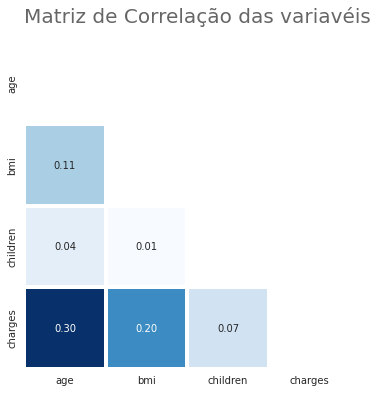

In [54]:
#calculando a matriz de correlação entre as variáveis
matriz_de_correlacao = df.corr()

#criando uma máscara para melhor visualização
mascara = np.zeros_like(matriz_de_correlacao)
mascara[np.triu_indices_from(mascara)] = True

#plotando a matriz de correlação usando seaborn
with sns.axes_style('white'):
  fig,ax = plt.subplots(figsize=(6,6))
  ax = sns.heatmap(matriz_de_correlacao,mask=mascara,square=True,cmap='Blues',annot=True,fmt='.2f',linewidths=3,cbar=False)
  ax.set_title('Matriz de Correlação das variavéis',loc='left',pad=20,fontdict={'fontsize':20},color='#666666')

avaliando ímc e se é fumante - texto

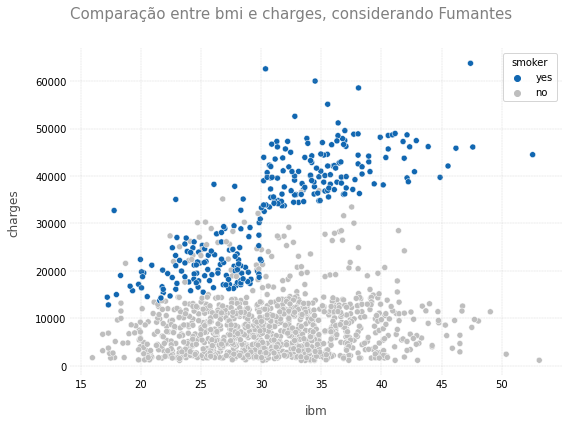

In [158]:
#criando o ax e o fig no matplotlib
fig,ax = plt.subplots(figsize=(8,6))

#construindo o scatter com seaborn
sns.scatterplot(data=df,x='bmi',y='charges',hue='smoker',ax=ax,palette=['#1167b1','#BEBEBE'])
ax.set_frame_on(False)
ax.grid(linestyle='-.',lw=0.25,aa=True)
ax.legend(loc='best',title='smoker')
ax.tick_params(axis='both',length=0)
ax.set_title('Comparação entre bmi e charges, considerando Fumantes',loc='left',pad=30,fontdict={'fontsize':15},color='grey')
ax.set_xlabel('ibm',labelpad=15,fontdict={'fontsize':12},color='#4c4c4c')
ax.set_ylabel('charges',labelpad=15,fontdict={'fontsize':12},color='#4c4c4c')


#plotando o gráfico
plt.tight_layout();

# Criação dos Modelos de Machine Learning

In [ ]:
#instalando o pycaret no colab
!pip install pycaret -q

     |████████████████████████████████| 266 kB 5.1 MB/s 
     |████████████████████████████████| 2.0 MB 54.5 MB/s 
     |████████████████████████████████| 1.3 MB 70.7 MB/s 
     |████████████████████████████████| 111 kB 69.5 MB/s 
     |████████████████████████████████| 167 kB 57.2 MB/s 
     |████████████████████████████████| 14.6 MB 108 kB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 261 kB 26.5 MB/s 
     |████████████████████████████████| 6.8 MB 24.2 MB/s 
     |████████████████████████████████| 80 kB 9.5 MB/s 
     |████████████████████████████████| 271 kB 57.3 MB/s 
     |████████████████████████████████| 1.7 MB 20.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 10.1 MB 39.0 MB/s 
     |████████████████████████████████| 3.1 MB 45.7 MB/s 
     |█████████████████

In [ ]:
#importando os módulos da biblioteca Pycaret (Auto Machine Learning)
from pycaret.regression import *

#configurando o colab para o pycaret
from pycaret.utils import enable_colab
enable_colab()

#Previsão dos Custos de Seguro de Vida

#Conclusões

* isso
* aquilo
* etc